In [2]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report, accuracy_score
import tensorflow.keras.utils as utils 
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

batch_size = 32
img_height = 100
img_width = 100

In [3]:
train_ds = image_dataset_from_directory(
    directory='Dataset/',
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=1,
    interpolation='bilinear',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    follow_links=False,
)

val_ds = image_dataset_from_directory(
    directory='Dataset/',
    validation_split=0.2,
    subset='validation',
    shuffle=True,
    seed=1,
    interpolation='bilinear',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    follow_links=False,
)


class_names = train_ds.class_names
num_classes = len(class_names)


Found 1900 files belonging to 19 classes.
Using 1520 files for training.


2022-04-08 19:08:01.726763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 19:08:01.744060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 19:08:01.744696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 19:08:01.746180: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 1900 files belonging to 19 classes.
Using 380 files for validation.


In [4]:
# normalization_layer = layers.Rescaling(1./255)
# train_ds = train_ds.map(lambda x, y: (
    # normalization_layer(x), y))
# train_ds = train_ds.map(lambda x, y: (
#     tf.where(normalization_layer(x) > 0.5, 0, 1), y))

# val_ds = val_ds.map(lambda x, y: (
    # normalization_layer(x), y))
# val_ds = val_ds.map(lambda x, y: (
#     tf.where(normalization_layer(x) > 0.5, 0, 1), y))


# data_augmentation = keras.Sequential(
#   [
#     layers.RandomRotation(0.1, fill_mode='constant', fill_value=1.0),
#     layers.RandomZoom(0.1, fill_mode='constant', fill_value=1.0),
#   ]
# )

model = Sequential([
    # data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Flatten(),
    # layers.Dense(512, activation='sigmoid'),
    layers.Dense(num_classes),
])


In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 1)       0         
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 19)                190019    
                                                                 
Total params: 190,019
Trainable params: 190,019
Non-trainable params: 0
_________________________________________________________________


In [7]:
epochs=200
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/200
48/48 [==============================] - 1s 9ms/step - loss: 9.0804 - accuracy: 0.0586 - val_loss: 3.6571 - val_accuracy: 0.1474
Epoch 2/200
48/48 [==============================] - 0s 6ms/step - loss: 3.1689 - accuracy: 0.1572 - val_loss: 2.9709 - val_accuracy: 0.1500
Epoch 3/200
48/48 [==============================] - 0s 6ms/step - loss: 3.0549 - accuracy: 0.2092 - val_loss: 2.9869 - val_accuracy: 0.1737
Epoch 4/200
48/48 [==============================] - 0s 5ms/step - loss: 2.8704 - accuracy: 0.2546 - val_loss: 2.9801 - val_accuracy: 0.2500
Epoch 5/200
48/48 [==============================] - 0s 5ms/step - loss: 2.8355 - accuracy: 0.2776 - val_loss: 3.6281 - val_accuracy: 0.1763
Epoch 6/200
48/48 [==============================] - 0s 5ms/step - loss: 2.6760 - accuracy: 0.3447 - val_loss: 3.4091 - val_accuracy: 0.2316
Epoch 7/200
48/48 [==============================] - 0s 6ms/step - loss: 2.6212 - accuracy: 0.3467 - val_loss: 4.0632 - val_accuracy: 0.1895
Epoch 8/200
4

In [8]:
history.model.save('model.h5')

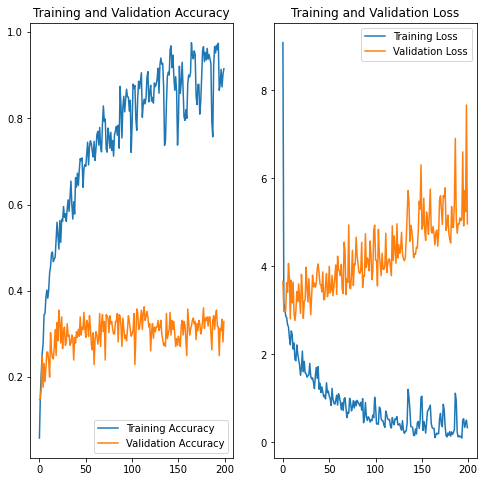

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [41]:
y_pred = np.array([])
y_true = np.array([])
for x, y in train_ds:
    y_pred = np.concatenate(
        [y_pred, np.argmax(model.predict(x), axis=-1)])
    y_true = np.concatenate([y_true, y.numpy()])

print("Classification report for training set:")
print(classification_report(y_true, y_pred, output_dict=False))
print()
print(accuracy_score(y_true, y_pred))


Classification report for training set:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        87
         1.0       0.64      1.00      0.78        77
         2.0       0.98      1.00      0.99        83
         3.0       1.00      0.92      0.96        87
         4.0       1.00      0.97      0.99        75
         5.0       1.00      1.00      1.00        81
         6.0       1.00      0.89      0.94        76
         7.0       1.00      0.96      0.98        82
         8.0       1.00      0.91      0.96        82
         9.0       1.00      0.98      0.99        81
        10.0       0.88      1.00      0.93        79
        11.0       1.00      0.96      0.98        85
        12.0       1.00      0.80      0.89        80
        13.0       1.00      1.00      1.00        73
        14.0       1.00      0.96      0.98        81
        15.0       0.99      0.92      0.95        76
        16.0       1.00      1.00      1.

In [11]:
y_pred = np.array([])
y_true = np.array([])
for x, y in val_ds:
    y_pred = np.concatenate(
        [y_pred, np.argmax(model.predict(x), axis=-1)])
    y_true = np.concatenate([y_true, y.numpy()])

print("Classification report for validation set:")
print(classification_report(y_true, y_pred, output_dict=False))
print()
print(accuracy_score(y_true, y_pred))


Classification report for validation set:
              precision    recall  f1-score   support

         0.0       0.07      0.08      0.07        13
         1.0       0.22      0.57      0.31        23
         2.0       0.35      0.53      0.42        17
         3.0       0.15      0.15      0.15        13
         4.0       0.33      0.28      0.30        25
         5.0       0.42      0.26      0.32        19
         6.0       0.64      0.29      0.40        24
         7.0       0.20      0.11      0.14        18
         8.0       0.33      0.11      0.17        18
         9.0       0.44      0.21      0.29        19
        10.0       0.28      0.71      0.40        21
        11.0       0.59      0.67      0.62        15
        12.0       0.71      0.25      0.37        20
        13.0       0.32      0.48      0.38        27
        14.0       0.86      0.32      0.46        19
        15.0       0.41      0.46      0.43        24
        16.0       0.14      0.16      

## add noise

In [53]:
y_true = []
noisy_ds_10 = np.zeros((1520, img_height, img_width, 1))
i = 0
for x, y in train_ds:
    for img, label in zip(x, y):
        noisy_ds_10[i] = random_noise(
            img.numpy(), mode='s&p', amount=0.1).reshape(img_height, img_width, 1)
        y_true.append(label)
        i += 1

noisy_ds_20 = np.zeros((1520, img_height, img_width, 1))
i = 0
for x, y in train_ds:
    for img in x:
        noisy_ds_20[i] = random_noise(
            img.numpy(), mode='s&p', amount=0.2).reshape(img_height, img_width, 1)
        i += 1


In [54]:
y_pred = np.array([])
y_pred = np.concatenate(
    [y_pred, np.argmax(model.predict(noisy_ds_10), axis=-1)])

print("Classification report for 10% noisy dataset:")
print(classification_report(y_true, y_pred, output_dict=False))
print()
print(accuracy_score(y_true, y_pred))


Classification report for 10% noisy dataset:
              precision    recall  f1-score   support

           0       0.25      0.83      0.38        87
           1       0.57      0.47      0.51        77
           2       0.58      0.60      0.59        83
           3       0.91      0.23      0.37        87
           4       1.00      0.13      0.24        75
           5       0.95      0.46      0.62        81
           6       1.00      0.36      0.52        76
           7       0.93      0.16      0.27        82
           8       0.70      0.65      0.67        82
           9       0.71      0.70      0.71        81
          10       0.71      0.68      0.70        79
          11       0.00      0.00      0.00        85
          12       0.93      0.16      0.28        80
          13       0.44      0.59      0.51        73
          14       0.95      0.25      0.39        81
          15       0.00      0.00      0.00        76
          16       0.36      0.99   

/home/ms/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ms/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ms/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
y_pred = np.array([])
y_pred = np.concatenate(
    [y_pred, np.argmax(model.predict(noisy_ds_20), axis=-1)])

print("Classification report for 20% noisy dataset:")
print(classification_report(y_true, y_pred, output_dict=False))
print()
print(accuracy_score(y_true, y_pred))


Classification report for 20% noisy dataset:
              precision    recall  f1-score   support

           0       0.06      0.18      0.09        87
           1       0.08      0.05      0.06        77
           2       0.07      0.08      0.08        83
           3       0.00      0.00      0.00        87
           4       0.00      0.00      0.00        75
           5       0.03      0.01      0.02        81
           6       0.00      0.00      0.00        76
           7       0.00      0.00      0.00        82
           8       0.05      0.05      0.05        82
           9       0.06      0.06      0.06        81
          10       0.07      0.06      0.07        79
          11       0.00      0.00      0.00        85
          12       0.00      0.00      0.00        80
          13       0.04      0.05      0.05        73
          14       0.06      0.01      0.02        81
          15       0.00      0.00      0.00        76
          16       0.04      0.11   

/home/ms/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ms/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ms/miniconda3/envs/AI/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
